#diabetes_012_health_indicators_BRFSS2015.csv

Diabetes_binary: 0 = no diabetes 1 = prediabetes 2 = diabetes

HighBP: 0 = no high BP 1 = high BP

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI : Body Mass Index

Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

Stroke : (Ever told) you had a stroke. 0 = no 1 = yes

HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

AnyHealthcare : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? 0 = no 1 = yes

NoDocbcCost : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

GenHlth : Would you say that in general your health is: rate (1 ~ 5)

MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

PhysHlth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Sex : Indicate sex of respondent (0,1) (Female or Male)

Age : Fourteen-level age category (1 ~ 14)

Education : What is the highest grade or year of school you completed? (1 ~ 6)

Income : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

In [113]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [115]:
#This will print all problematic rows for manual review or systematic cleaning.
with open("diabetes_012_health_indicators_BRFSS2015.csv", "r", encoding="Windows-1252") as file:
    for i, line in enumerate(file):
        if line.count(",") != 21:
            print(f"Line {i}: {line}")

In [117]:
#Fix the Malformed Line If the problematic line is not critical, skip it during loading:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", encoding='Windows-1252', on_bad_lines='skip', na_values=["NA", "na", "", "null", "Null", "NULL"])


In [119]:
#head
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [121]:
#tail
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [123]:
#Sanity check of data
df.shape

(253680, 22)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [127]:
print(df['Veggies'].unique())

[1. 0.]


In [129]:
df['Veggies'] = pd.to_numeric(df['Veggies'], errors='coerce')
df['Veggies'] = df['Veggies'].fillna(0)

In [131]:
print(df['Veggies'].unique())

[1. 0.]


In [133]:
df = df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [135]:
#finding missing values
print("missing values:",df.isnull().sum())

missing values: Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [137]:
# # Fill missing values with the median
# data = df.fillna(df.median(numeric_only=True))

In [139]:
#finding duplicates
df.duplicated().sum()
#approx. 9% of data is duplicate

23899

In [141]:
#drop duplicates
#df.drop_duplicates(inplace = True)
#df.duplicated().sum()
#df.shape

In [143]:
#Exploratory Data Analysis(EDA)

In [145]:
#Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [147]:
unique_values = df.nunique()
print(unique_values)

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


In [149]:
# Generate the detailed unique value overview
detailed_overview = "=== Unique Value Detailed Overview ===\n\n"
for col in df.columns:
    unique_values = sorted(df[col].unique().tolist())
    detailed_overview += f"{col}:\nUnique Values:{unique_values}\n\n"

# Display the overview
print(detailed_overview)

=== Unique Value Detailed Overview ===

Diabetes_012:
Unique Values:[0, 1, 2]

HighBP:
Unique Values:[0, 1]

HighChol:
Unique Values:[0, 1]

CholCheck:
Unique Values:[0, 1]

BMI:
Unique Values:[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95, 96, 98]

Smoker:
Unique Values:[0, 1]

Stroke:
Unique Values:[0, 1]

HeartDiseaseorAttack:
Unique Values:[0, 1]

PhysActivity:
Unique Values:[0, 1]

Fruits:
Unique Values:[0, 1]

Veggies:
Unique Values:[0, 1]

HvyAlcoholConsump:
Unique Values:[0, 1]

AnyHealthcare:
Unique Values:[0, 1]

NoDocbcCost:
Unique Values:[0, 1]

GenHlth:
Unique Values:[1, 2, 3, 4, 5]

MentHlth:
Unique Values:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

In [151]:
#Check outliers using box plot
columns = df.columns.tolist()
print(columns)

['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [153]:
# Suppress all warnings
warnings.filterwarnings("ignore")

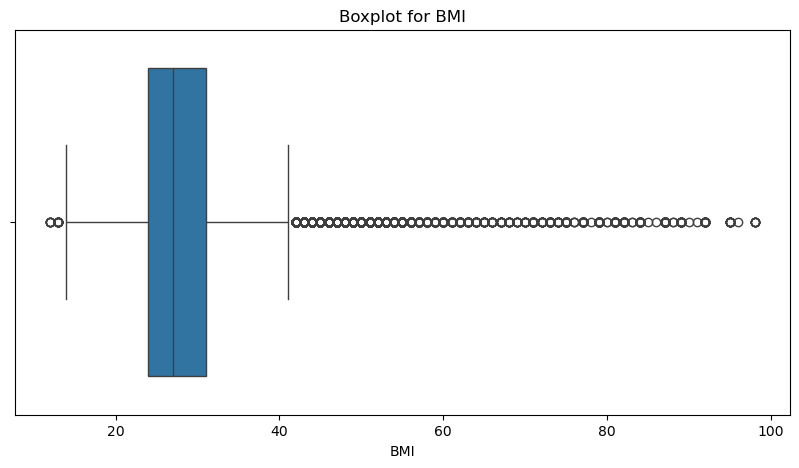

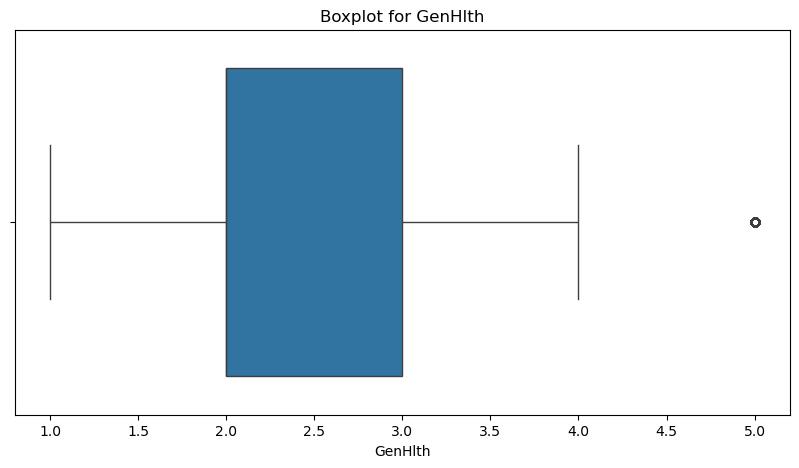

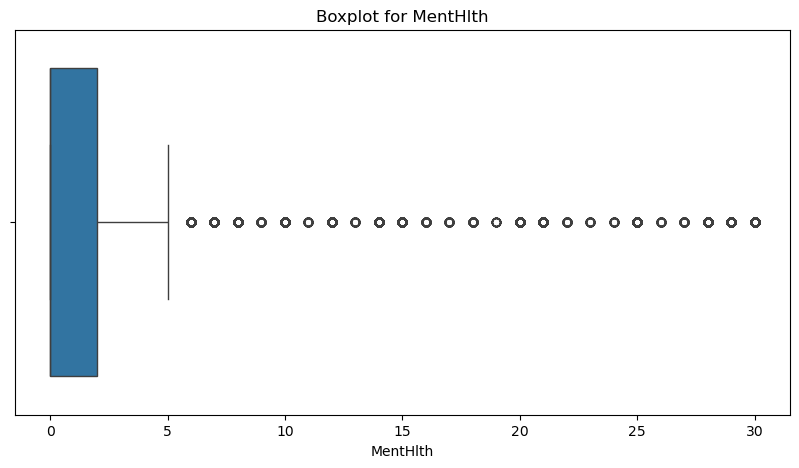

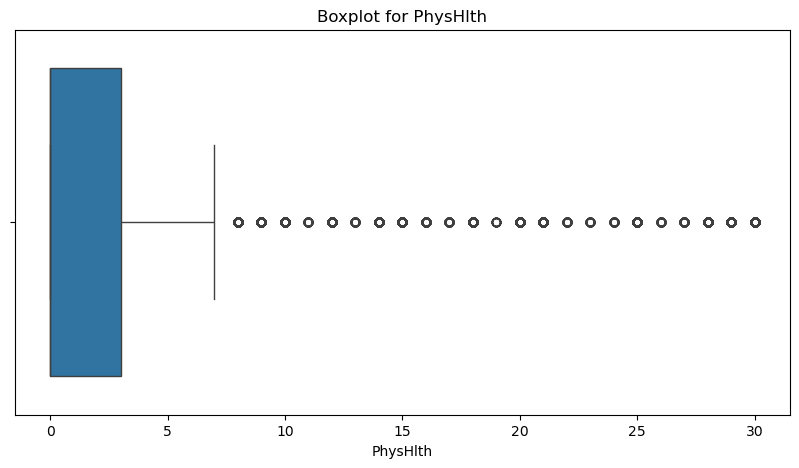

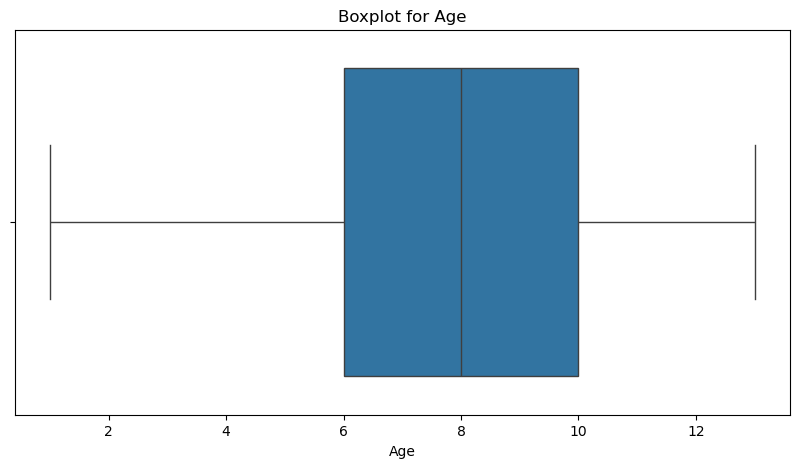

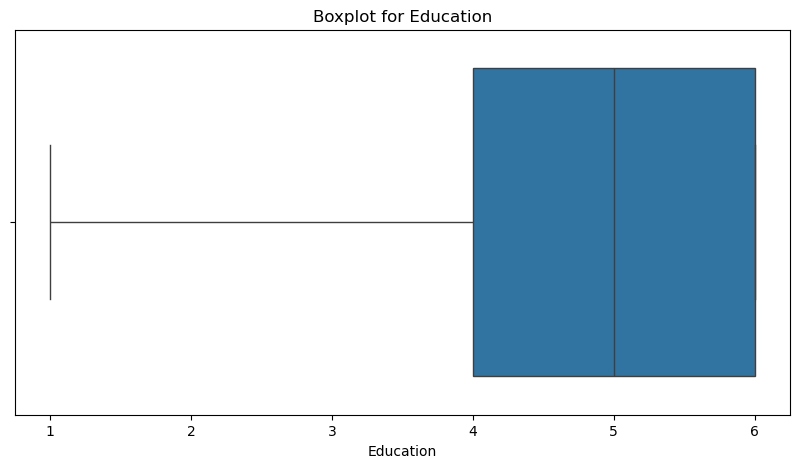

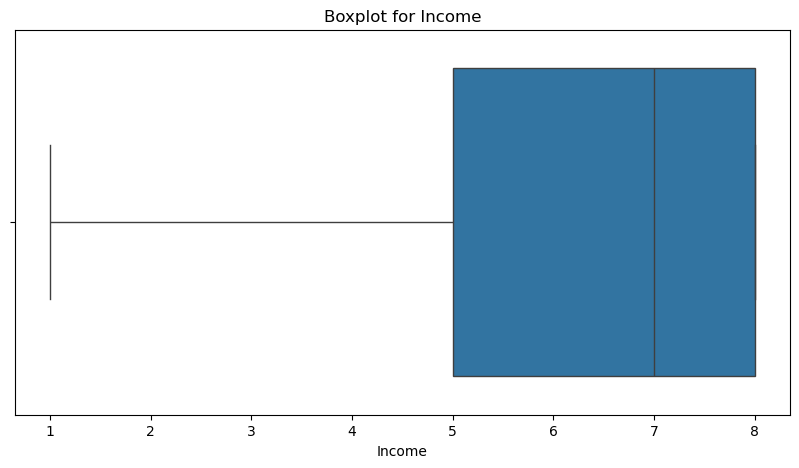

In [155]:
for col in ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data = df, x = col)
    plt.title(f'Boxplot for {col}')
    plt.show()

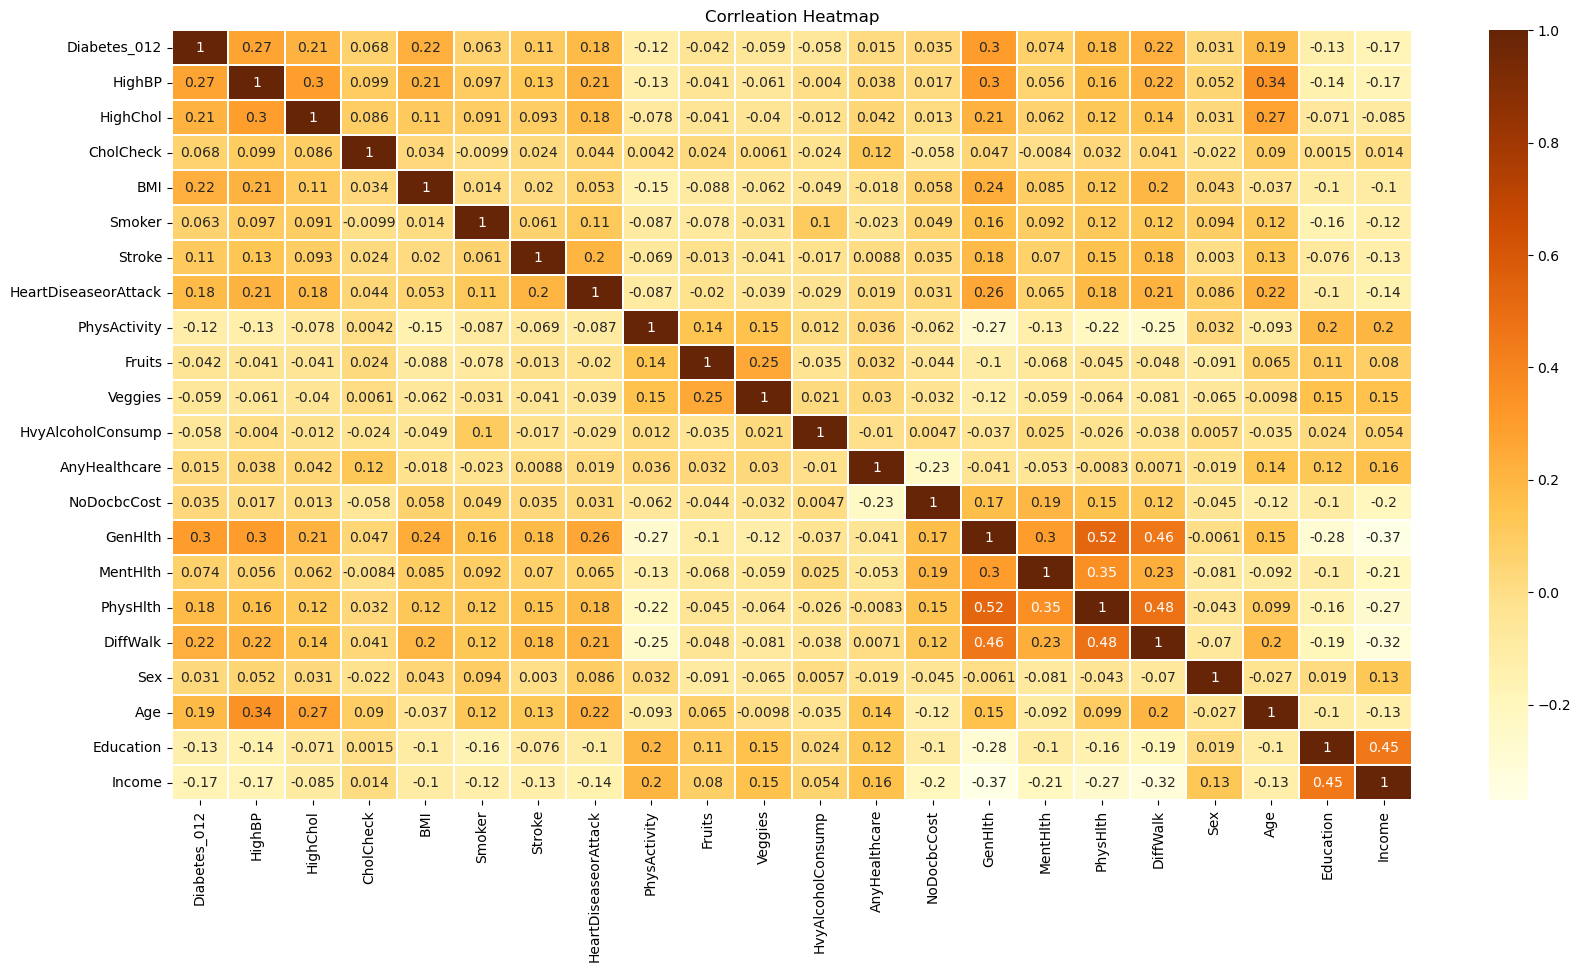

In [156]:
#Corrleation Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrBr', linewidths = 0.3)
plt.title('Corrleation Heatmap')
plt.show()

In [157]:
# Better show categorical variables
data2 = df.copy()

In [158]:
# That help us to show the relation between features clearly
#### Age
age_maping = {
    1: '18 to 24',
    2: '25 to 29',
    3: '30 to 34',
    4: '35 to 39',
    5: '40 to 44',
    5: '45 to 49',
    6: '50 to 54',
    7: '55 to 59',
    8: '60 to 64',
    9: '65 to 69',
    10: '70 to 74',
    11: '75 to 79',
    12: '80 or Older'
}
data2['Age'] = data2['Age'].replace(age_maping)


education_maping={
    1: 'Never Attended School',
    2: 'Elementary',
    3: 'Junior High School',
    4: 'Senior High School',
    5: 'Undergraduate Degree',
    6: 'Magister'
}
data2['Education']=data2['Education'].replace(education_maping)


income_maping = {
    1: 'Less Than $10,000 ',
    2: 'Less Than $10,000 ',
    3: 'Less Than $10,000 ',
    4: 'Less Than $10,000 ',
    5: 'Less Than $35,000 ',
    6: 'Less Than $35,000 ',
    7: 'Less Than $35,000 ',
    8: '$75,000 or More '
}
data2['Income']=data2['Income'].replace(income_maping)

data2.Diabetes_012[data2['Diabetes_012']==0]='No Diabetes'
data2.Diabetes_012[data2['Diabetes_012']==1]='Diabetes'

data2.HighBP[data2['HighBP']==0]='No High'
data2.HighBP[data2['HighBP']==1]='High BP'

data2.HighChol[data2['HighChol']==0]='No High Cholesterol'
data2.HighChol[data2['HighChol']==1]=' High Cholesterol'

data2.CholCheck[data2['CholCheck']==0]='No Chol Check in 5 Years'
data2.CholCheck[data2['CholCheck']==1]='Chol Check in 5 Years'

data2.Smoker[data2['Smoker']==0]='No'
data2.Smoker[data2['Smoker']==1]='Yes'

data2.Stroke[data2['Stroke']==0]='No'
data2.Stroke[data2['Stroke']==1]='Yes'

data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack']==0]='No'
data2.HeartDiseaseorAttack[data2['HeartDiseaseorAttack']==1]='Yes'

data2.PhysActivity[data2['PhysActivity']==0]='No'
data2.PhysActivity[data2['PhysActivity']==1]='Yes'

data2.Fruits[data2['Fruits']==0]='No'
data2.Fruits[data2['Fruits']==1]='Yes'

data2.Veggies[data2['Veggies']==0]='No'
data2.Veggies[data2['Veggies']==1]='Yes'

data2.MentHlth[data2['MentHlth']==0]='No'
data2.MentHlth[data2['MentHlth']==1]='Yes'

data2.PhysHlth[data2['PhysHlth']==0]='No'
data2.PhysHlth[data2['PhysHlth']==1]='Yes'

data2.DiffWalk[data2['DiffWalk']==0]='No'
data2.DiffWalk[data2['DiffWalk']==1]='Yes'

data2.Sex[data2['Sex']==0]='Female'
data2.Sex[data2['Sex']==1]='Male'

data2.AnyHealthcare[data2['AnyHealthcare']==0]='No'
data2.AnyHealthcare[data2['AnyHealthcare']==1]='Yes'

data2.NoDocbcCost[data2['NoDocbcCost']==0]='No'
data2.NoDocbcCost[data2['NoDocbcCost']==1]='Yes'

data2.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,40,Yes,No,No,No,No,...,Yes,No,5,18,15,Yes,Female,65 to 69,Senior High School,"Less Than $10,000"
1,No Diabetes,No High,No High Cholesterol,No Chol Check in 5 Years,25,Yes,No,No,Yes,No,...,No,Yes,3,No,No,No,Female,55 to 59,Magister,"Less Than $10,000"
2,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,28,No,No,No,No,Yes,...,Yes,Yes,5,30,30,Yes,Female,65 to 69,Senior High School,"$75,000 or More"
3,No Diabetes,High BP,No High Cholesterol,Chol Check in 5 Years,27,No,No,No,Yes,Yes,...,Yes,No,2,No,No,No,Female,75 to 79,Junior High School,"Less Than $35,000"
4,No Diabetes,High BP,High Cholesterol,Chol Check in 5 Years,24,No,No,No,Yes,Yes,...,Yes,No,2,3,No,No,Female,75 to 79,Undergraduate Degree,"Less Than $10,000"


array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

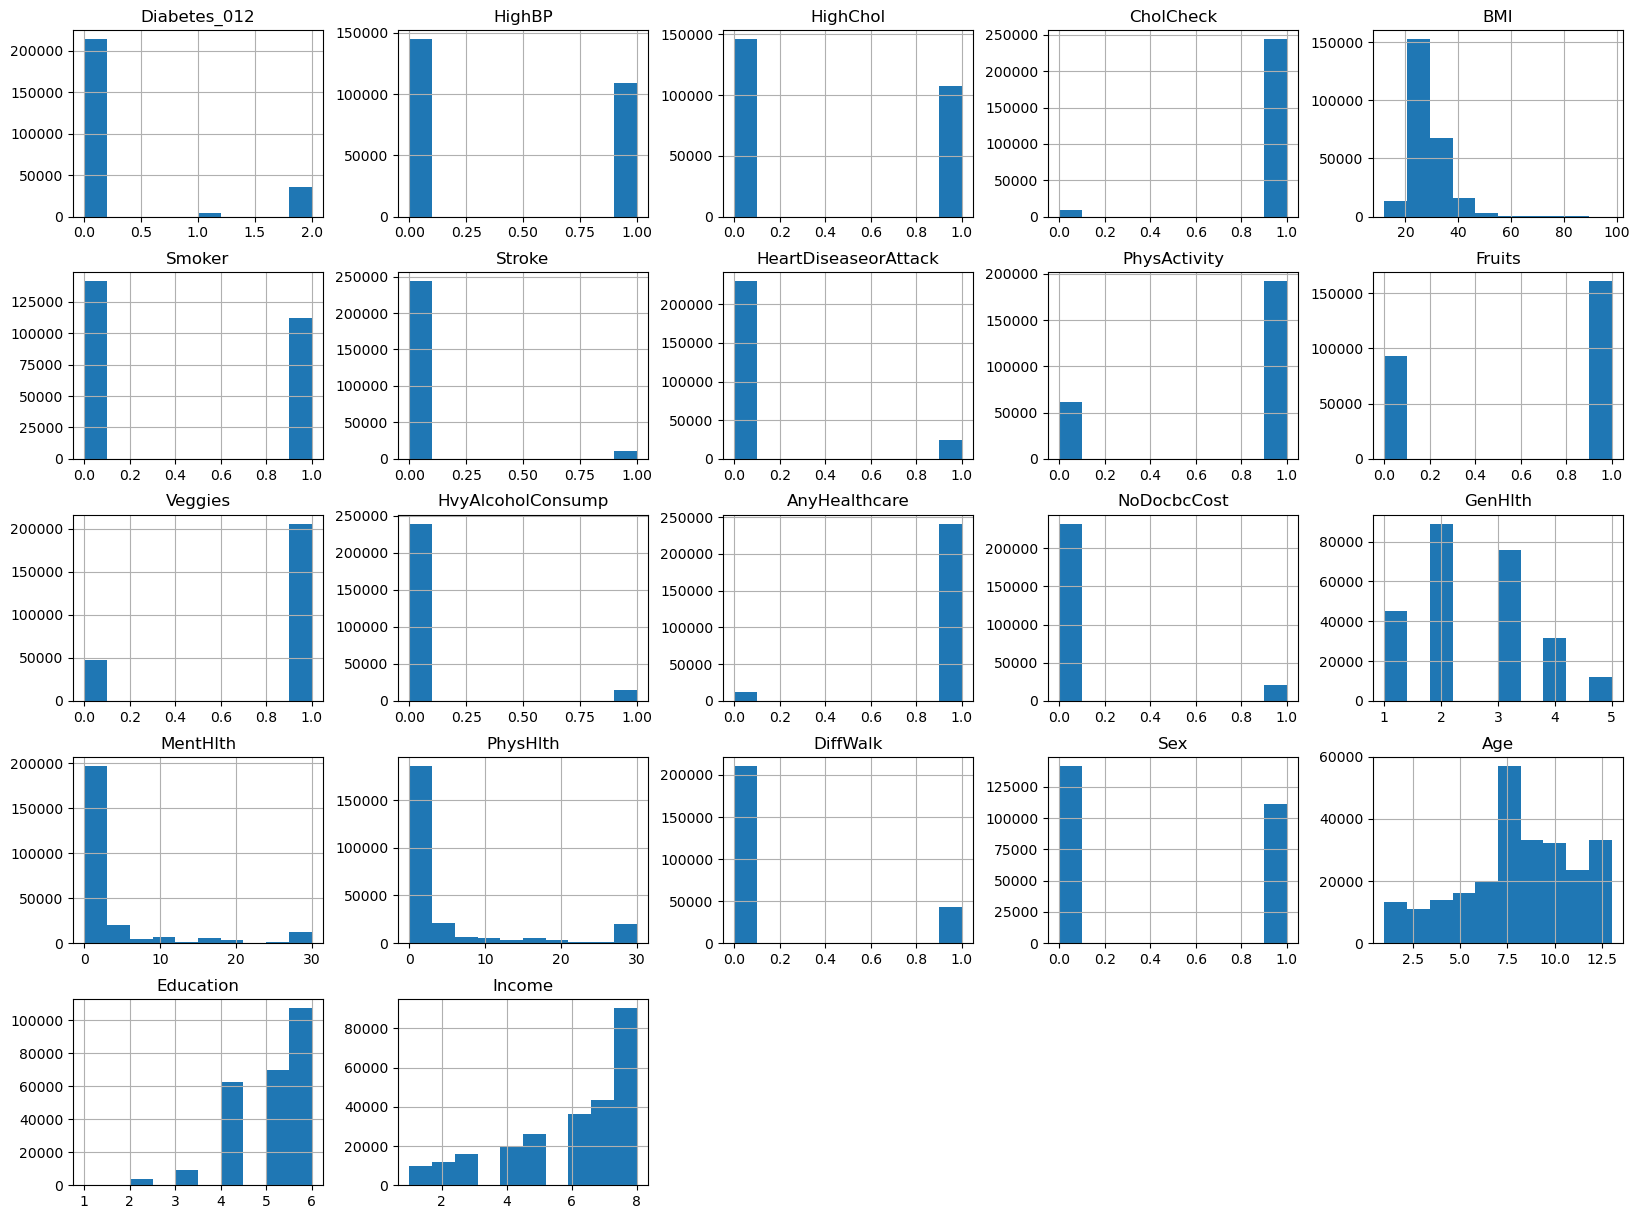

In [159]:
df.hist(figsize = (20,15))

<Axes: xlabel='Diabetes_012', ylabel='count'>

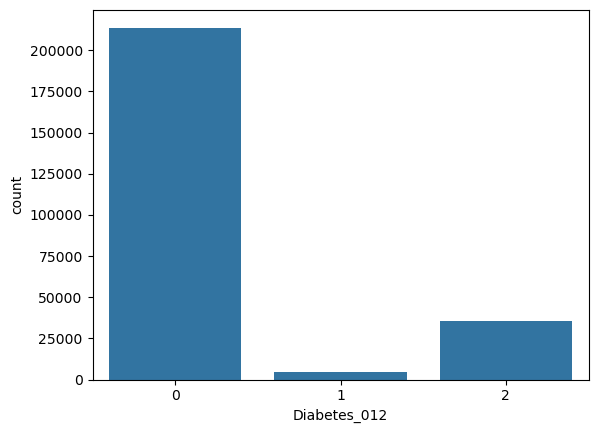

In [160]:
#Diabetes frequency
sns.countplot(x = 'Diabetes_012', data = df)

In [161]:
'''
The Variance Inflation Factor (VIF) test is used in statistical modeling and regression analysis
to detect and quantify multicollinearity among predictor variables. Multicollinearity occurs when
two or more independent variables in a regression model are highly correlated, making it difficult
to determine the individual contribution of each variable to the dependent variable.
'''

'\nThe Variance Inflation Factor (VIF) test is used in statistical modeling and regression analysis\nto detect and quantify multicollinearity among predictor variables. Multicollinearity occurs when\ntwo or more independent variables in a regression model are highly correlated, making it difficult\nto determine the individual contribution of each variable to the dependent variable.\n'

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [164]:
#VIF Test
def calculate_vif(dataframe):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): DataFrame containing only the predictor variables (independent variables).

    Returns:
    pd.DataFrame: DataFrame with features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Drop the target variable and calculate VIF
predictor_columns = add_constant(df.drop(columns = ['Diabetes_012']))
vif_result = calculate_vif(predictor_columns)
print(vif_result)

                 Feature         VIF
0                  const  115.971455
1                 HighBP    1.330684
2               HighChol    1.173313
3              CholCheck    1.032822
4                    BMI    1.139724
5                 Smoker    1.091787
6                 Stroke    1.081070
7   HeartDiseaseorAttack    1.171917
8           PhysActivity    1.157311
9                 Fruits    1.112533
10               Veggies    1.112385
11     HvyAlcoholConsump    1.024059
12         AnyHealthcare    1.113104
13           NoDocbcCost    1.144158
14               GenHlth    1.795892
15              MentHlth    1.239297
16              PhysHlth    1.623288
17              DiffWalk    1.533902
18                   Sex    1.075060
19                   Age    1.349994
20             Education    1.326390
21                Income    1.503931


In [173]:
# ANOVA Feature Select
'''
ANOVA (Analysis of Variance) Feature Selection is used in machine learning to determine
which features are statistically significant in predicting the target variable.
'''
# # Define target and features
# X = df.drop('Diabetes_012', axis=1)  # Features
# y = df['Diabetes_012']              # Target

# #Ensure the target variable is numeric (if not, encode it)
# # le = LabelEncoder()
# # y = le.fit_transform(y)  # Encode target variable if necessary

# from sklearn.feature_selection import SelectKBest, f_classif

# # Perform ANOVA F-test
# selector = SelectKBest(score_func=f_classif, k='all')  # Use 'k' to select top k features
# X_selected = selector.fit_transform(X, y)

# # Get feature scores
# scores = selector.scores_
# p_values = selector.pvalues_

# # Combine results into a DataFrame
# feature_scores = pd.DataFrame({
#     'Feature': X.columns,
#     'F-Score': scores,
#     'p-Value': p_values
# }).sort_values(by='F-Score', ascending=False)

# print(feature_scores)

'\nANOVA (Analysis of Variance) Feature Selection is used in machine learning to determine\nwhich features are statistically significant in predicting the target variable.\n'

In [175]:
# #Select Significant Features
# significant_features = feature_scores[feature_scores['p-Value'] < 0.05]['Feature'].tolist()
# # Filter the dataset
# X_significant = X[significant_features] #Use Selected Features in Modeling

In [177]:
#NOW DO THE SAME TEST USING CHI-SQUARE TEST AS WE HAVE CATEGORICAL FEATURES DATA

# Define target and features
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']              # Target

# Ensure all features are non-negative for Chi-squared test
# If there are negative values, transform the data (e.g., MinMaxScaler)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

from sklearn.feature_selection import SelectKBest, chi2
# Apply Chi-squared test
chi2_selector = SelectKBest(score_func=chi2, k=16)  # Select top 16 features
X_chi2_selected = chi2_selector.fit_transform(X, y)

# Retrieve scores and feature names
scores = chi2_selector.scores_  # Chi-squared scores
features = X.columns

# Combine features and scores into a DataFrame
chi2_scores = pd.DataFrame({
    'Feature': features,
    'Chi2 Score': scores
}).sort_values(by='Chi2 Score', ascending=False)

# Display the top 16 features
top_16_features = chi2_scores.nlargest(21, 'Chi2 Score')
print(top_16_features)

                 Feature     Chi2 Score
15              PhysHlth  141598.783225
14              MentHlth   24607.463010
3                    BMI   19775.252090
0                 HighBP   10731.721009
16              DiffWalk   10627.556856
13               GenHlth   10595.234173
18                   Age   10225.159975
6   HeartDiseaseorAttack    7468.339377
1               HighChol    6483.776499
20                Income    5380.434934
5                 Stroke    2798.417025
7           PhysActivity     922.529401
19             Education     849.169260
10     HvyAlcoholConsump     802.538572
4                 Smoker     562.684715
12           NoDocbcCost     362.740875
9                Veggies     168.560797
8                 Fruits     166.174822
17                   Sex     140.390490
2              CholCheck      43.816645
11         AnyHealthcare       3.381194


In [179]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [181]:
columns = ['Veggies', 'Fruits', 'Sex', 'CholCheck', 'AnyHealthcare']
df.drop(columns, axis = 1, inplace = True)

In [336]:
#Data Splitting
X = df.drop('Diabetes_012', axis = 1)
y = df['Diabetes_012']

In [338]:
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64


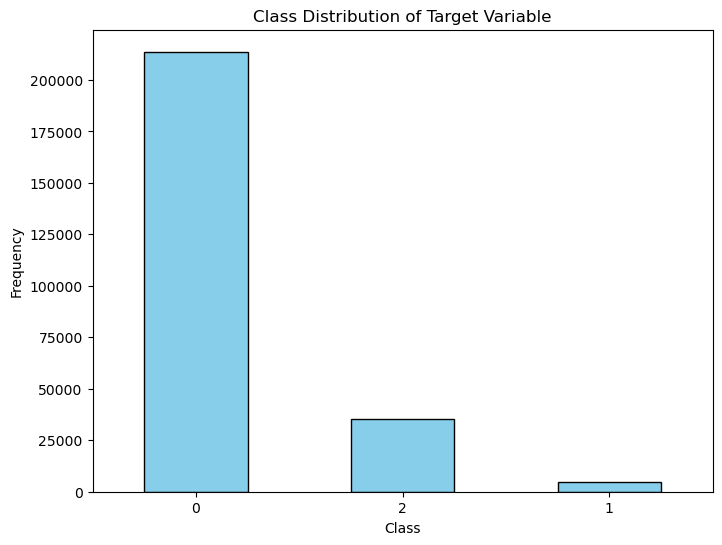

In [342]:
# Check the distribution of the target variable
print(y.value_counts())

# Plot the class distribution
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [344]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [346]:
#Before SMOTE: Look at the precision, recall, and F1-score for the minority class.
#High accuracy might be masking poor performance on this class.

#Logistic Regression
#Logistic regression is for classification problems where the target variable is categorical.
# Train logistic regression
model = LogisticRegression(class_weight='balanced', random_state = 42, max_iter = 1500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Before SMOTE:")
print(classification_report(y_test, y_pred, target_names=["Majority Class", "middle class", "Minority Class"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Before SMOTE:
                precision    recall  f1-score   support

Majority Class       0.95      0.67      0.78     42795
  middle class       0.03      0.31      0.06       944
Minority Class       0.35      0.60      0.44      6997

      accuracy                           0.65     50736
     macro avg       0.45      0.52      0.43     50736
  weighted avg       0.85      0.65      0.72     50736

Confusion Matrix:
 [[28511  6946  7338]
 [  267   294   383]
 [ 1159  1661  4177]]


In [347]:
# We use SMOTE (Synthetic Minority Oversampling Technique) when dealing with imbalanced datasets,
# especially in classification tasks where one class has significantly fewer examples than others.

In [348]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [349]:
# Check the class distribution before applying SMOTE
print("Before SMOTE:", y.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("After SMOTE:", y_train_smote.value_counts())

# Output the shapes of the new datasets
print("Original X_train shape:", X_train.shape)
print("SMOTE X_train shape:", X_train_smote.shape)

Before SMOTE: Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64
After SMOTE: Diabetes_012
0    170908
2    170908
1    170908
Name: count, dtype: int64
Original X_train shape: (202944, 16)
SMOTE X_train shape: (512724, 16)


In [350]:
#After SMOTE: Compare these metrics again. If the minority class metrics improve,
#SMOTE might be beneficial despite the drop in overall accuracy.
model = LogisticRegression(random_state = 42, max_iter = 1500)
model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)

print("\nAfter SMOTE:")
print(classification_report(y_test, y_pred_smote, target_names=["Majority Class","Middle class", "Minority Class"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


After SMOTE:
                precision    recall  f1-score   support

Majority Class       0.93      0.65      0.77     42795
  Middle class       0.02      0.21      0.04       944
Minority Class       0.34      0.62      0.44      6997

      accuracy                           0.64     50736
     macro avg       0.43      0.49      0.42     50736
  weighted avg       0.83      0.64      0.71     50736

Confusion Matrix:
 [[27894  6877  8024]
 [  329   198   417]
 [ 1686   973  4338]]


In [198]:
#Near Miss is an undersampling technique applied to the majority class.
#Apply Near Miss to the majority class to remove redundant or less-informative examples,
#keeping the dataset balanced.

In [199]:
# # Apply Near Miss to the oversampled data
# near_miss = NearMiss(version=1)  # You can try different versions
# X_train_near_miss, y_train_near_miss = near_miss.fit_resample(X_train_smote, y_train_smote)

In [207]:
# #Tomek Links:
# from imblearn.under_sampling import TomekLinks

# tl = TomekLinks()
# X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

# #Random Undersampling:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# #Condensed Nearest Neighbor (CNN)
# #Approximate Nearest Neighbors

In [354]:
display(df.shape)

(253680, 17)

In [360]:
#Perform scaling (e.g., standardization or normalization) only on the training data and transform
#the test data using the same scaling parameters from the training set.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_smote)
X_test = scaler.fit_transform(X_test)

In [362]:
'''Modeling'''

'Modeling'

In [215]:
#Logistic Regression
#Logistic regression is for classification problems where the target variable is categorical.
# Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
model = LogisticRegression(random_state = 42, max_iter = 1500)
model.fit(X_train, y_train_smote)

LogisticRegression(max_iter=1500, random_state=42)

In [217]:
# # Predict and evaluate
# y_predict = model.predict(X_test)
# y_pred_probability = model.predict_proba(X_test)[:, 1]
# #model.predict() provides the class label (0 or 1) based on the default threshold of 0.5.
# #model.predict_proba() provides the probabilities for both classes, allowing for more nuanced analysis.

# # Evaluate
# print("Accuracy:", accuracy_score(y_test, y_predict))
# print("Classification Report:\n", classification_report(y_test, y_predict))
# print("ROC AUC Score:", roc_auc_score(y_test, y_pred_probability))

In [219]:
y_pred = model.predict(X_test)

print('Training set score:{:4f}'.format(model.score(X_train,y_train_smote)))
print('test set score {:4f}'.format(model.score(X_test,y_test)))
print("Accuracy:", accuracy_score(y_test, y_pred))

#Why Compare Training and Test Scores?
# Training Score > Test Score by a Large Margin:
# This could indicate overfitting: the model learned the training data too well, including noise, and fails to generalize.
# Training Score ≈ Test Score:
# This suggests the model generalizes well and is likely neither underfitting nor overfitting.
# Low Scores for Both:
# This might indicate underfitting: the model is too simple or hasn't learned the data structure effectively.

Training set score:0.547199
test set score 0.472860
Accuracy: 0.47285950804162724


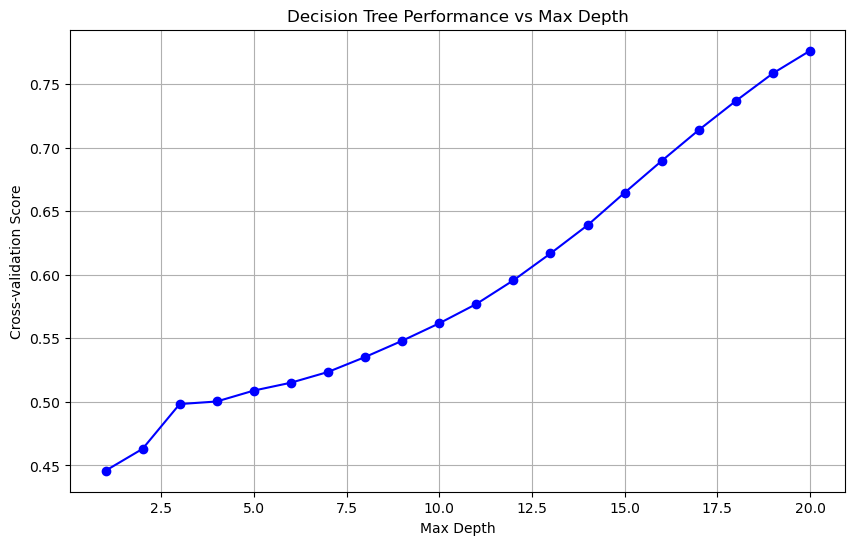

Best depth: 20
Best score: 0.7762


In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
max_depths = range(1, 21)
scores = []

#applies a hyperparameter tuning strategy for the max_depth parameter of a DecisionTreeClassifier,
#evaluating its performance using cross-validation.
for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    score = cross_val_score(dt, X_train, y_train_smote, cv=5).mean()
    scores.append(score)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, scores, 'bo-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Score')
plt.title('Decision Tree Performance vs Max Depth')
plt.grid(True)
plt.show()

# Find best depth
best_depth = max_depths[np.argmax(scores)]
print(f"Best depth: {best_depth}")
print(f"Best score: {max(scores):.4f}")

In [364]:
dt = DecisionTreeClassifier(max_depth = 26, class_weight='balanced')
dt.fit(X_train,y_train_smote)
y_pred_dt = dt.predict(X_test)

In [366]:
#Decision Tree MSE and RMSE
import math
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = math.sqrt(mean_squared_error(y_test,y_pred_dt))
print("MSE_dt:"+str(mse_dt))
print('RMSE_dt:'+str(rmse_dt))
#A lower MSE indicates better model performance.
# the model's predictions deviate from the actual target values by approximately 1.08 units.

MSE_dt:1.1202499211605172
RMSE_dt:1.0584185944892113


In [368]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.6546436455376853
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78     42795
           1       0.02      0.08      0.03       944
           2       0.24      0.46      0.31      6997

    accuracy                           0.65     50736
   macro avg       0.38      0.41      0.38     50736
weighted avg       0.78      0.65      0.70     50736



In [229]:
cm_dt_report = classification_report(y_test,y_pred_dt)
print(cm_dt_report)
print("MSE_dt:"+str(mse_dt))
print('RMSE_dt:'+str(rmse_dt))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78     42795
           1       0.02      0.08      0.03       944
           2       0.24      0.46      0.31      6997

    accuracy                           0.66     50736
   macro avg       0.38      0.41      0.38     50736
weighted avg       0.78      0.66      0.70     50736

MSE_dt:1.1208412172816147
RMSE_dt:1.058697887634435


In [231]:
'''Decision Tree Confusion Matrix'''
!pip install mlxtend
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

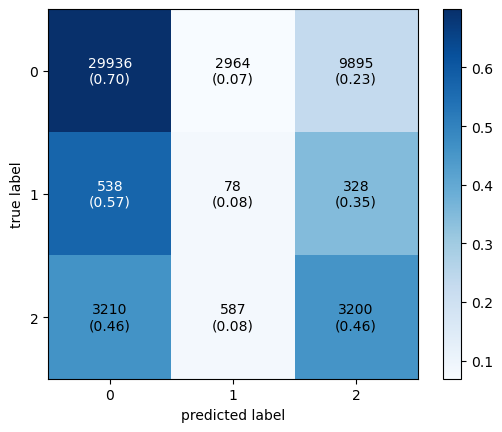

In [370]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
plot_confusion_matrix(conf_mat = cm_dt, show_absolute = True,
                     show_normed = True,
                     colorbar = True)
plt.show()

In [235]:
# KNN  It works by storing the entire training dataset and classifying or predicting a data point based on the majority
# class (classification) or the average value (regression) of its nearest neighbors.
#check whether data is nonlinear.

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Best parameters: {'n_neighbors': 1}
Best score: 0.8024375874819059


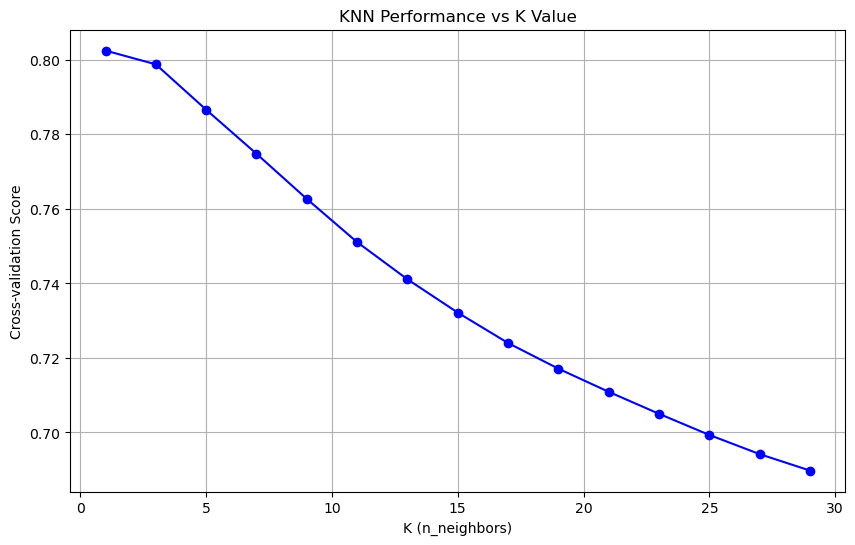

In [239]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_neighbors': range(1, 31, 2)
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train,y_train_smote)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Plot scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31, 2), grid_search.cv_results_['mean_test_score'], 'bo-')
plt.xlabel('K (n_neighbors)')
plt.ylabel('Cross-validation Score')
plt.title('KNN Performance vs K Value')
plt.grid(True)
plt.show()

In [372]:
#Train the KNN model
knn = KNeighborsClassifier(n_neighbors=1)  # Use 5 neighbors by default
knn.fit(X_train,y_train_smote)
#Evaluate the model
y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[31101  2372  9322]
 [  538    79   327]
 [ 3289   466  3242]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80     42795
           1       0.03      0.08      0.04       944
           2       0.25      0.46      0.33      6997

    accuracy                           0.68     50736
   macro avg       0.39      0.42      0.39     50736
weighted avg       0.79      0.68      0.72     50736


Accuracy Score: 0.6784531693472091


In [374]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [242]:
import os
print("Number of available CPU cores:", os.cpu_count())

Number of available CPU cores: 24


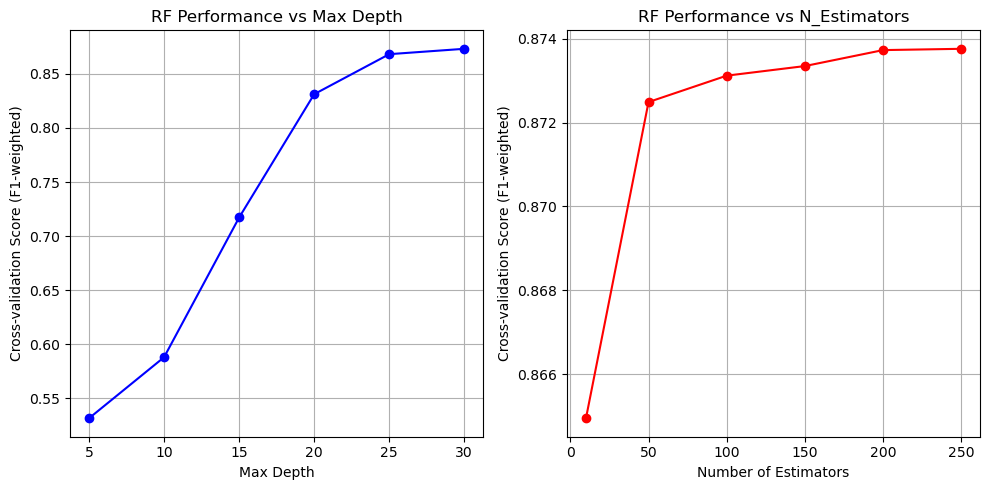

Best max_depth: 30
Best n_estimators: 250


In [243]:
# Define hyperparameters to test
max_depths = [5, 10, 15, 20, 25, 30]
n_estimators = [10, 50, 100, 150, 200, 250]

# Placeholder for scores
depth_scores = []
estimator_scores = []

# Test max_depths (keeping n_estimators fixed at 100)
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42, n_jobs=-2)
    scores = cross_val_score(rf, X_train, y_train_smote, cv=5, scoring='f1_weighted', n_jobs=-2)  # Use F1-weighted for imbalanced data
    depth_scores.append(scores.mean())

# Plot depth results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(max_depths, depth_scores, 'bo-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-validation Score (F1-weighted)')
plt.title('RF Performance vs Max Depth')
plt.grid(True)

# Test n_estimators (using best depth)
best_depth = max_depths[np.argmax(depth_scores)]
for n_est in n_estimators:
    rf = RandomForestClassifier(max_depth=best_depth, n_estimators=n_est, random_state=42)
    scores = cross_val_score(rf, X_train, y_train_smote, cv=5, scoring='f1_weighted')  # Use F1-weighted for imbalanced data
    estimator_scores.append(scores.mean())

# Plot n_estimators results
plt.subplot(1, 2, 2)
plt.plot(n_estimators, estimator_scores, 'ro-')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-validation Score (F1-weighted)')
plt.title('RF Performance vs N_Estimators')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print best parameters
best_n_estimators = n_estimators[np.argmax(estimator_scores)]
print(f"Best max_depth: {best_depth}")
print(f"Best n_estimators: {best_n_estimators}")

In [376]:
# Final model training
rf = RandomForestClassifier(max_depth=best_depth, n_estimators=best_n_estimators, random_state=42)
rf.fit(X_train, y_train_smote)
y_pred_rf = rf.predict(X_test)

In [378]:
# Classification metrics
rf_matrix = classification_report(y_test, y_pred_rf, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
print(rf_matrix)

              precision    recall  f1-score   support

 No Diabetes       0.91      0.78      0.84     42795
 Prediabetes       0.03      0.03      0.03       944
    Diabetes       0.31      0.56      0.40      6997

    accuracy                           0.73     50736
   macro avg       0.41      0.46      0.42     50736
weighted avg       0.81      0.73      0.76     50736



In [380]:
# Calculate and print MSE, RMSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mse_rf)
print(f'MSE_RF: {mse_rf}')
print(f'RMSE_RF: {rmse_rf}')

MSE_RF: 0.9385643330179754
RMSE_RF: 0.9687952998533671


In [382]:
# ROC-AUC Score (for multi-class)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.70209927257092


In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(conf_mat=cm_rf, show_absolute=True, show_normed=True, colorbar=True, class_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.show()

In [259]:
'''What risk factors are most predictive of diabetes risk?'''

'What risk factors are most predictive of diabetes risk?'

In [261]:
!pip install ace_tools

In [262]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Separating features and target
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

# Perform ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Extract feature scores
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame for feature importance
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': scores,
    'p-Value': p_values
}).sort_values(by='F-Score', ascending=False)

# Display the top features in Jupyter Notebook
from IPython.display import display
display(feature_scores)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Feature Importance (ANOVA F-Score)", dataframe=feature_scores)

# # Next steps: Use selected features to build a model for predictive evaluation.
# feature_scores.head()


,Feature,F-Score,p-Value
9,GenHlth,12832.618212,0.000000e+00
0,HighBP,10149.134689,0.000000e+00
2,BMI,6822.294189,0.000000e+00
12,DiffWalk,6727.221242,0.000000e+00
1,HighChol,5890.841105,0.000000e+00
13,Age,4560.460134,0.000000e+00
5,HeartDiseaseorAttack,4260.879901,0.000000e+00
11,PhysHlth,4078.699229,0.000000e+00
15,Income,3913.773186,0.000000e+00
14,Education,2246.023785,0.000000e+00


In [263]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
# Select top features for model building
top_features = feature_scores[feature_scores['p-Value'] < 0.05]['Feature']

# Reduce the dataset to these top features
X_reduced = X[top_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42, stratify=y)

# Train a Random Forest Classifier as a baseline model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
classification_rep = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])

# Display the results
accuracy, roc_auc, classification_rep


(0.8359218963523599,
 0.726378238626456,
 '              precision    recall  f1-score   support\n\n No Diabetes       0.87      0.96      0.91     64111\n Prediabetes       0.02      0.00      0.00      1389\n    Diabetes       0.44      0.21      0.29     10604\n\n    accuracy                           0.84     76104\n   macro avg       0.44      0.39      0.40     76104\nweighted avg       0.79      0.84      0.81     76104\n')

In [ ]:
'''Pipeline for Comparison:'''

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# from sklearn.model_selection import cross_val_score
# import pandas as pd
# import numpy as np

# # Define models to compare
# models = {
#     "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500),
#     "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "Support Vector Machine": SVC(class_weight='balanced', probability=True, random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier()
# }

# # Dictionary to store results
# results = {}

# # Train and evaluate each model
# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     model.fit(X_train, y_train_smote)  # Train on SMOTE data
#     y_pred = model.predict(X_test)  # Predict on test set
#     y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

#     # Collect performance metrics
#     report = classification_report(y_test, y_pred, output_dict=True)
#     roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else None

#     # Store metrics
#     results[name] = {
#         "Classification Report": report,
#         "ROC-AUC": roc_auc,
#         "Confusion Matrix": confusion_matrix(y_test, y_pred)
#     }

# # Summarize results
# for name, metrics in results.items():
#     print(f"\nModel: {name}")
#     print("Classification Report:")
#     print(pd.DataFrame(metrics["Classification Report"]).transpose())
#     print(f"ROC-AUC: {metrics['ROC-AUC']}")
#     print("Confusion Matrix:")
#     print(metrics["Confusion Matrix"])

In [ ]:
'''Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?'''

In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Subset data to use only the top 5 features
top_5_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']
X_subset = df[top_5_features]
y = df['Diabetes_012']

# Train-test split
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, y, test_size=0.3, random_state=42, stratify=y
)

# Train a Random Forest Classifier on the subset
rf_model_subset = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model_subset.fit(X_train_subset, y_train_subset)

# Predictions
y_pred_subset = rf_model_subset.predict(X_test_subset)
y_pred_proba_subset = rf_model_subset.predict_proba(X_test_subset)

# Evaluate the model
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)
roc_auc_subset = roc_auc_score(y_test_subset, y_pred_proba_subset, multi_class='ovr')
classification_rep_subset = classification_report(
    y_test_subset, y_pred_subset, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']
)

accuracy_subset, roc_auc_subset, classification_rep_subset


(0.8476032797224851,
 0.7541886841526987,
 '              precision    recall  f1-score   support\n\n No Diabetes       0.86      0.98      0.92     64111\n Prediabetes       0.00      0.00      0.00      1389\n    Diabetes       0.55      0.15      0.23     10604\n\n    accuracy                           0.85     76104\n   macro avg       0.47      0.38      0.38     76104\nweighted avg       0.80      0.85      0.80     76104\n')

In [271]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_subset, y_train_subset)

# Train a Random Forest Classifier on the balanced dataset
rf_model_balanced = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model_balanced.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_balanced = rf_model_balanced.predict(X_test_subset)
y_pred_proba_balanced = rf_model_balanced.predict_proba(X_test_subset)

# Evaluate the model
accuracy_balanced = accuracy_score(y_test_subset, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test_subset, y_pred_proba_balanced, multi_class='ovr')
classification_rep_balanced = classification_report(
    y_test_subset, y_pred_balanced, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']
)

accuracy_balanced, roc_auc_balanced, classification_rep_balanced


(0.5939635235992852,
 0.7185478977932007,
 '              precision    recall  f1-score   support\n\n No Diabetes       0.95      0.60      0.74     64111\n Prediabetes       0.02      0.27      0.04      1389\n    Diabetes       0.32      0.58      0.42     10604\n\n    accuracy                           0.59     76104\n   macro avg       0.43      0.49      0.40     76104\nweighted avg       0.84      0.59      0.68     76104\n')

In [161]:
# Train a Random Forest model with class weights to address imbalance
rf_model_weighted = RandomForestClassifier(
    random_state=42, 
    n_estimators=100, 
    max_depth=10, 
    class_weight='balanced'
)
rf_model_weighted.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_weighted = rf_model_weighted.predict(X_test_subset)
y_pred_proba_weighted = rf_model_weighted.predict_proba(X_test_subset)

# Evaluate the model
accuracy_weighted = accuracy_score(y_test_subset, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test_subset, y_pred_proba_weighted, multi_class='ovr')
classification_rep_weighted = classification_report(
    y_test_subset, y_pred_weighted, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']
)

accuracy_weighted, roc_auc_weighted, classification_rep_weighted


(0.5939635235992852,
 0.7185478977932007,
 '              precision    recall  f1-score   support\n\n No Diabetes       0.95      0.60      0.74     64111\n Prediabetes       0.02      0.27      0.04      1389\n    Diabetes       0.32      0.58      0.42     10604\n\n    accuracy                           0.59     76104\n   macro avg       0.43      0.49      0.40     76104\nweighted avg       0.84      0.59      0.68     76104\n')

In [272]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=3, 
    verbose=2, 
    n_jobs=-1
)

# Fit the grid search to the SMOTE-balanced dataset
grid_search.fit(X_train_smote, y_train_smote)

# Retrieve the best parameters and model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predictions with the best model
y_pred_tuned = best_rf.predict(X_test_subset)
y_pred_proba_tuned = best_rf.predict_proba(X_test_subset)

# Evaluate the tuned model
accuracy_tuned = accuracy_score(y_test_subset, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test_subset, y_pred_proba_tuned, multi_class='ovr')
classification_rep_tuned = classification_report(
    y_test_subset, y_pred_tuned, target_names=['No Diabetes', 'Prediabetes', 'Diabetes']
)

best_params, accuracy_tuned, roc_auc_tuned, classification_rep_tuned


Fitting 3 folds for each of 81 candidates, totalling 243 fits


({'class_weight': 'balanced',
  'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.5836486912645853,
 0.706595028569771,
 '              precision    recall  f1-score   support\n\n No Diabetes       0.95      0.59      0.73     64111\n Prediabetes       0.02      0.28      0.04      1389\n    Diabetes       0.31      0.56      0.40     10604\n\n    accuracy                           0.58     76104\n   macro avg       0.43      0.48      0.39     76104\nweighted avg       0.84      0.58      0.67     76104\n')

In [281]:
import joblib

# Save the model
joblib.dump(model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [283]:
# Load the model
model = joblib.load('diabetes_model.pkl')

In [307]:
from sklearn.preprocessing import StandardScaler

# Assuming you used a scaler during training
scaler = StandardScaler()
scaler.fit(X_train_smote)  # Replace with your training data
X_train_scaled = scaler.transform(X_train_smote)

# Prepare the input
new_data = [[1, 25.4, 0, 3, 7]]
scaled_data = scaler.transform(new_data)

prediction = best_rf.predict(scaled_data)

In [309]:
print(f"Predicted class: {prediction[0]}")  # Output the predicted class

Predicted class: 2


In [318]:
# import joblib

# # Save the trained model
# joblib.dump(best_rf, 'short_form_diabetes_model.pkl')

# # Save the selected features
# selected_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol']
# joblib.dump(selected_features, 'selected_features.pkl')

In [320]:
# from flask import Flask, request, jsonify
# import joblib
# import pandas as pd

# # Load the model and features
# model = joblib.load('short_form_diabetes_model.pkl')
# features = joblib.load('selected_features.pkl')

# app = Flask(__name__)

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()
#     input_data = pd.DataFrame([data], columns=features)
#     prediction = model.predict(input_data)
#     probabilities = model.predict_proba(input_data)
#     return jsonify({
#         'prediction': int(prediction[0]),
#         'probabilities': probabilities.tolist()[0]
#     })

# if __name__ == '__main__':
#     app.run(debug=True)
